In [29]:
# Import image processing libraries
from scipy import ndimage


import cv2
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math

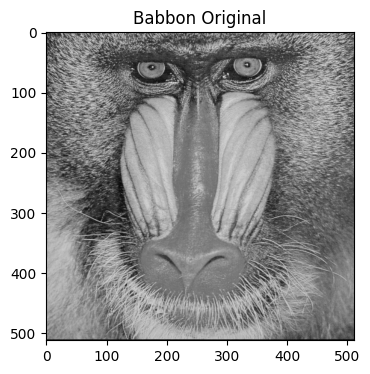

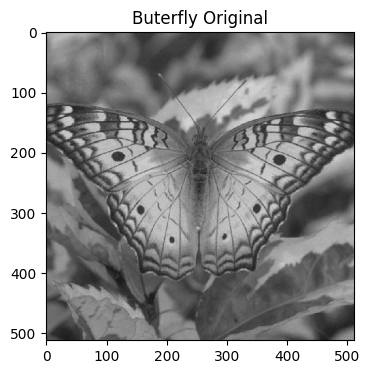

In [30]:
# Load some images (all the examples will use the baboon image)
img = cv2.imread("baboon.png")
plt.imshow(img)
plt.title("Babbon Original")
plt.show()

# Use the butterfly image for the last example
img2 = cv2.imread("butterfly.png")
plt.imshow(img2)
plt.title("Buterfly Original")
plt.show()

1.1 Transformac ̧ ̃ao de Intensidade
Dada (a) uma imagem monocrom ́atica, transformar seu espac ̧o de intensidades (n ́ıveis de cinza)
para (b) obter o negativo da imagem, ou seja, o n ́ıvel de cinza 0 ser ́a convertido para 255, o n ́ıvel
1 para 254 e assim por diante, (c) converter o intervalo de intensidades para [100, 200], (d)
inverter os valores dos pixels das linhas pares da imagem, ou seja, os valores dos pixels da linha 0
ser ̃ao posicionados da direita para esquerda, os valores dos pixels da linha 2 ser ̃ao posicionados
da direita para a esquerda e assim por diante, (e) espelhar as linhas da metade superior da
imagem na parte inferior da imagem e (f) aplicar um espelhamento vertical na imagem levando-
se em conta todas as linhas da imagem

1.2 Ajuste de Brilho
Aplicar a correc ̧ ̃ao gama para ajustar o brilho de uma imagem monocrom ́atica A de entrada
e gerar uma imagem monocrom ́atica B de sa ́ıda. A transformac ̧ ̃ao pode ser realizada (i)
convertendo-se as intensidades dos pixels para o intervalo de [0, 255] para [0, 1], (ii) aplicando-
se a equac ̧ ̃ao B = A(1/γ) e (iii) convertendo-se os valores resultantes de volta para o intervalo
[0, 255]. Realizar a correc ̧ ̃ao com diferentes valores de γ.

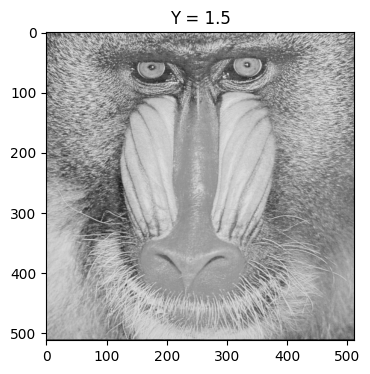

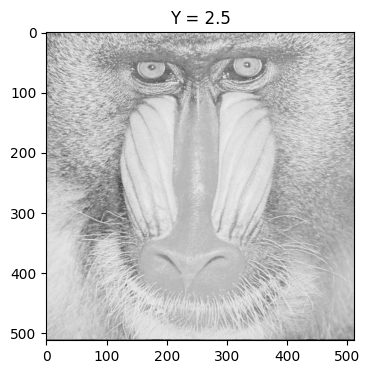

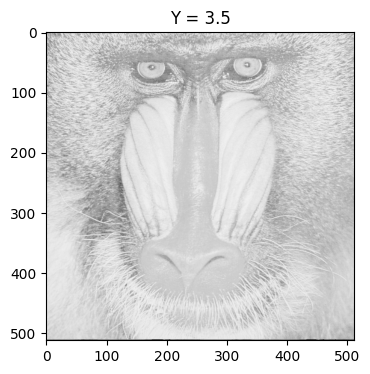

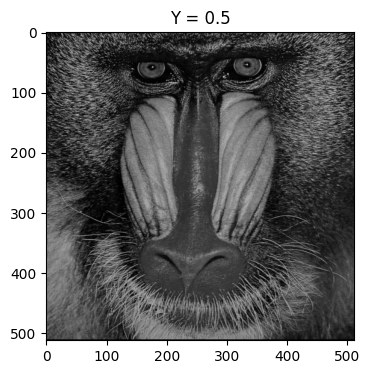

In [31]:
# Exercise 1.1

def bright_adjustment(img, factor):
    A = ((img / 255) ** (1/factor)) * 255
    return A.astype(int)

plt.imshow(bright_adjustment(img, 1.5))
plt.title("Y = 1.5")
plt.show()

plt.imshow(bright_adjustment(img, 2.5))
plt.title("Y = 2.5")
plt.show()

plt.imshow(bright_adjustment(img, 3.5))
plt.title("Y = 3.5")
plt.show()

plt.imshow(bright_adjustment(img, 0.5))
plt.title("Y = 0.5")
plt.show()


1.3 Planos de Bits
Extrair os planos de bits de uma imagem monocrom ́atica. Os n ́ıveis de cinza de uma imagem
monocrom ́atica com m bits podem ser representados na forma de um polinˆomio de base 2:
am−1 2m−1 + am−2 2m−2 + . . . + a1 21 + a0 20 (1)
O plano de bits de ordem 0  ́e formado pelos coeficientes a0 de cada pixel, enquanto o plano
de bits de ordem m − 1  ́e formado pelos coeficientes am−1.

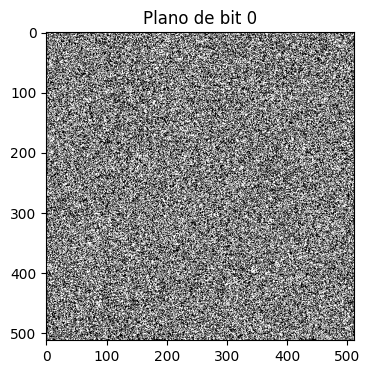

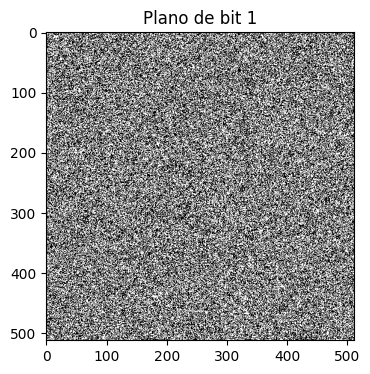

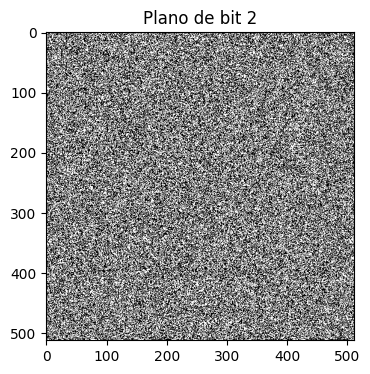

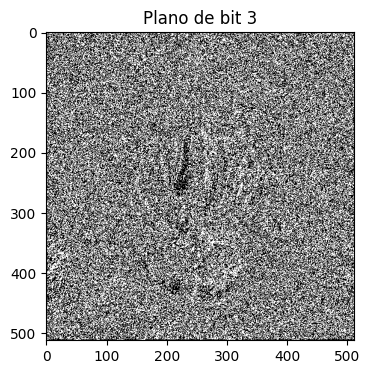

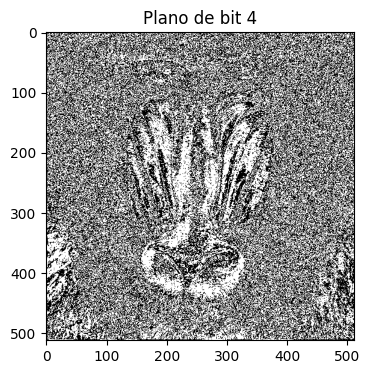

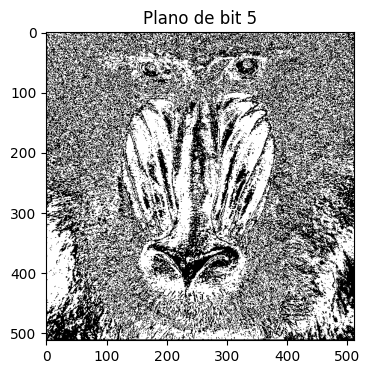

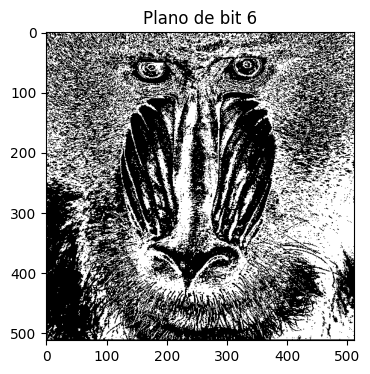

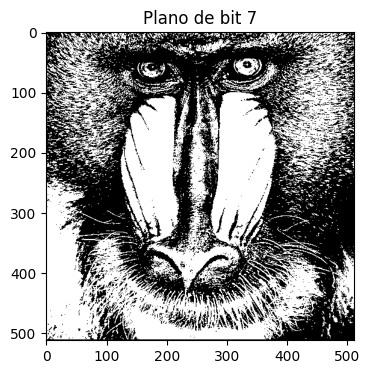

In [32]:
# Exercise 1.3
def bit_plane(img, plane):
    mask = img >> plane & 1
    return np.where(mask, 255, 0)

# Test all the 8 planes
for i in range(8):
    plt.imshow(bit_plane(img, i))
    plt.title("Plano de bit {}".format(i))
    plt.show()

1.4 Mosaico
Construir um mosaico de 4 × 4 blocos a partir de uma imagem monocrom ́atica. A disposic ̧ ̃ao dos
blocos deve seguir a numerac ̧ ̃ao mostrada na figura (c).

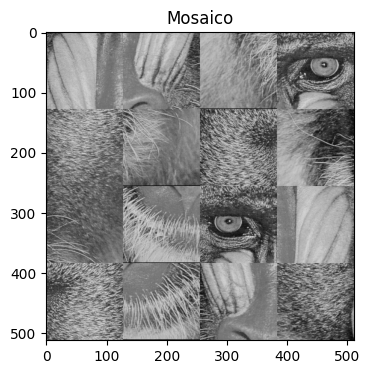

In [33]:
# Exercise 1.4

def mosaic_2(img, p):
    dh = img.shape[0] // p.shape[0]
    dw = img.shape[1] // p.shape[1]
    # divide the image in 4x4 smaller images
    A = img.reshape((p.shape[0], dh, p.shape[1], dw, 3))
    A = A.swapaxes(1,2)
    # Example: 16x128x128x3 (16 tiles of 128x128)
    A = A.reshape((p.shape[0] * p.shape[1], dh, dw, 3))
    # Filter using p (pattern) as mask
    return np.hstack(np.hstack(A[p]))

A = mosaic_2(img, np.array([6,11,13,3,8,16,1,9,12,14,2,7,4,15,10,5]).reshape((4,4)) - 1)

plt.imshow(A)
plt.title("Mosaico")
plt.show()

1.5 Combinac ̧ ̃ao de Imagens
Combinar duas imagens monocrom ́aticas de mesmo tamanho por meio da m ́edia ponderada de
seus n ́ıveis de cinza.

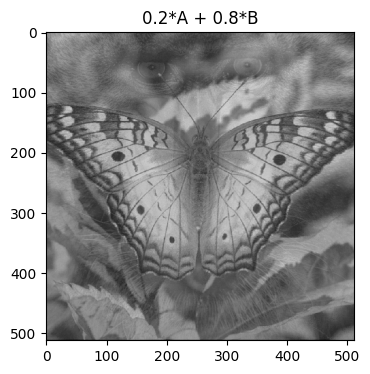

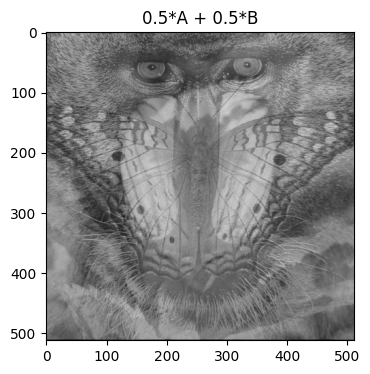

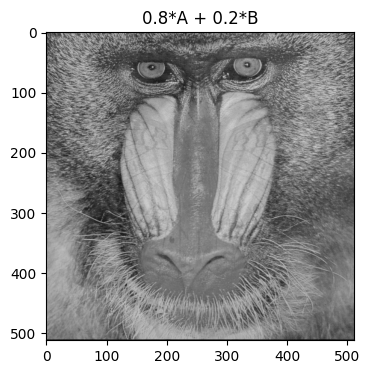

In [34]:
def image_combination(img1, s1, img2, s2):
    return (img1*s1 + img2*s2).astype(int)
    

plt.imshow(image_combination(img, 0.2, img2, 0.8))
plt.title("0.2*A + 0.8*B")
plt.show()

plt.imshow(image_combination(img, 0.5, img2, 0.5))
plt.title("0.5*A + 0.5*B")
plt.show()

plt.imshow(image_combination(img, 0.8, img2, 0.2))
plt.title("0.8*A + 0.2*B")
plt.show()

1.6 Filtragem de Imagens
A filtragem aplicada a uma imagem digital  ́e uma operac ̧ ̃ao local que altera os valores de in-
tensidade dos pixels da imagem levando-se em conta tanto o valor do pixel em quest ̃ao quanto
valores de pixels vizinhos.
No processo de filtragem, utiliza-se uma operac ̧ ̃ao de convoluc ̧ ̃ao de uma m ́ascara pela ima-
gem. Este processo equivale a percorrer toda a imagem alterando seus valores conforme os pesos
da m ́ascara e as intensidades da imagem.
Aplique os filtros h1 e h11 em uma imagem digital monocrom ́atica.

In [35]:


def save_image(img, name):
    # Normalize the image to [0 - 255] before saving it
    norm_image = cv2.normalize(img, None, alpha = 0, beta = 255, norm_type = cv2.NORM_MINMAX, dtype = cv2.CV_8U)
    cv2.imwrite(name, norm_image)

# black for borders, truncate to ignore gray image
def truncate_invert(img):
    return -1 * np.where(img > 1, 1, np.where(img < 0, 0, img))



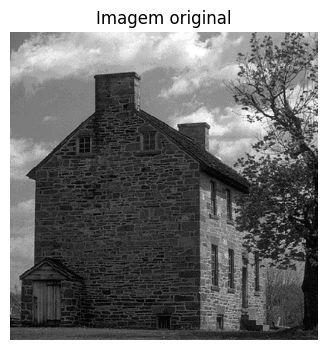

In [36]:
img = cv2.imread("house.png")
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
img = img / 255

plt.rcParams["figure.figsize"] = (8,4)

plt.imshow(img, cmap=plt.cm.gray)
plt.title("Imagem original"), plt.axis('off')
plt.show()

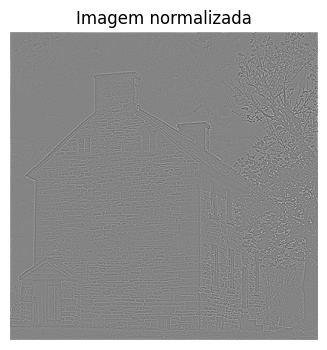

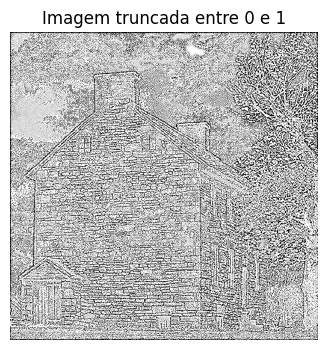

In [37]:
h1 = np.array([
    [0, 0, -1, 0, 0],
    [0, -1, -2, -1, 0],
    [-1, -2, 16, -2, -1],
    [0, -1, -2, -1, 0],
    [0, 0, -1, 0, 0],
])

new_image = ndimage.convolve(img, h1, mode='constant')

new_image_clip = truncate_invert(new_image)

plt.imshow(new_image, cmap=plt.cm.gray)
plt.title("Imagem normalizada"), plt.axis('off')
plt.show()

plt.imshow(new_image_clip, cmap=plt.cm.gray)
plt.title("Imagem truncada entre 0 e 1"), plt.axis('off')
plt.show()

save_image(new_image, 'results/exercicio16a.png')
save_image(new_image_clip, 'results/exercicio16aclipada.png')

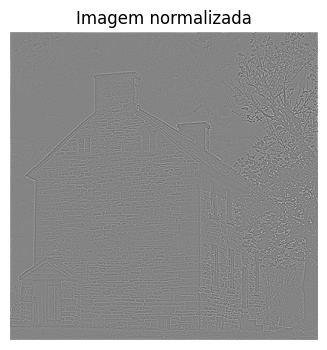

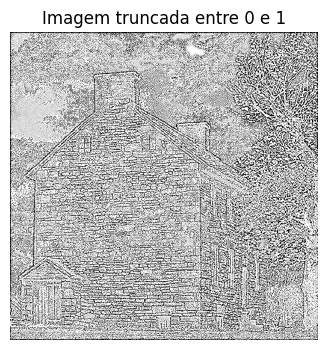

In [38]:
h11 = np.array([
    [-1, -1, 0],
    [-1, 0, -1],
    [0, 1, 1]
])

new_image = ndimage.convolve(img, h1, mode='constant')

new_image_clip = truncate_invert(new_image)

plt.imshow(new_image, cmap=plt.cm.gray)
plt.title("Imagem normalizada"), plt.axis('off')
plt.show()

plt.imshow(new_image_clip, cmap=plt.cm.gray)
plt.title("Imagem truncada entre 0 e 1"), plt.axis('off')
plt.show()

save_image(new_image, 'results/exercicio161a.png')
save_image(new_image_clip, 'results/exercicio16.png')

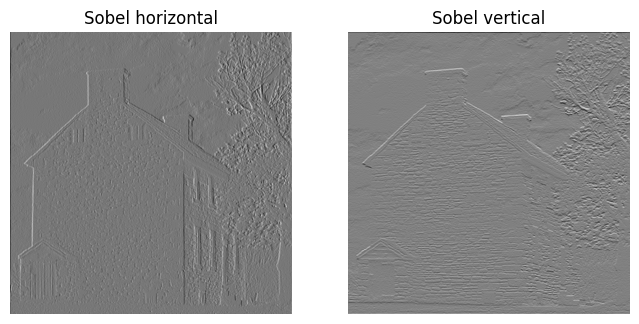

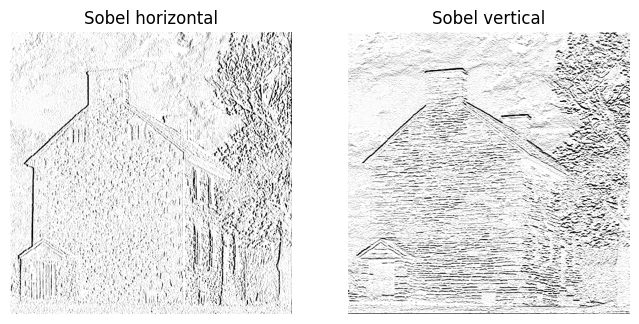

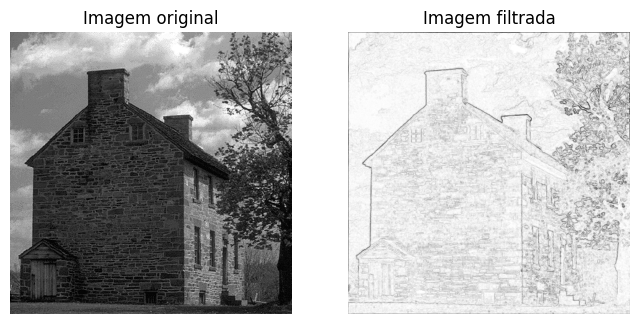

In [39]:
h3 = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0 ,1]
])

h4 = np.array([
    [-1, -2, -1],
    [0, 0, 0],
    [1, 2, 1]]
)

new_image_vertical = ndimage.convolve(img, h3, mode='constant')
new_image_horizontal = ndimage.convolve(img, h4, mode='constant')


new_image_vertical_clip = truncate_invert(new_image_vertical)
new_image_horizontal_clip = truncate_invert(new_image_horizontal)


plt.subplot(121), plt.imshow(new_image_vertical, cmap=plt.cm.gray)
plt.title("Sobel horizontal"), plt.axis('off')

plt.subplot(122), plt.imshow(new_image_horizontal, cmap=plt.cm.gray)
plt.title("Sobel vertical"), plt.axis('off')
plt.savefig('results/sobel.png')
plt.show()

plt.subplot(121), plt.imshow(new_image_vertical_clip, cmap=plt.cm.gray)
plt.title("Sobel horizontal"), plt.axis('off')

plt.subplot(122), plt.imshow(new_image_horizontal_clip, cmap=plt.cm.gray)
plt.title("Sobel vertical"), plt.axis('off')
plt.savefig('results/sobelclip.png')
plt.show()


# Sobel combination of the two filters (vertical and horizontal)
new_image = np.sqrt(new_image_vertical ** 2 + new_image_horizontal ** 2)
new_image = new_image * -1

plt.subplot(121), plt.imshow(img, cmap=plt.cm.gray)
plt.title("Imagem original"), plt.axis('off')

plt.subplot(122), plt.imshow(new_image, cmap=plt.cm.gray)
plt.title("Imagem filtrada"), plt.axis('off')
plt.show()

save_image(new_image, 'results/exercicio16c.png')